In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mlt 
import yfinance as yf

In [2]:
# get data from yahoo finance module.
start = '2012-01-01'
end = '2024-12-01'
stock = 'GOOG' 

data = yf.download(stock,start,end)

/tmp/ipykernel_4503/599832167.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

# in here i change data into index num.

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
3244,2024-11-22,165.992401,167.681516,165.135383,166.580352,24497000
3245,2024-11-25,168.842468,169.868911,166.819509,167.407474,21395700
3246,2024-11-26,170.028336,170.900301,168.842460,168.902264,14937500


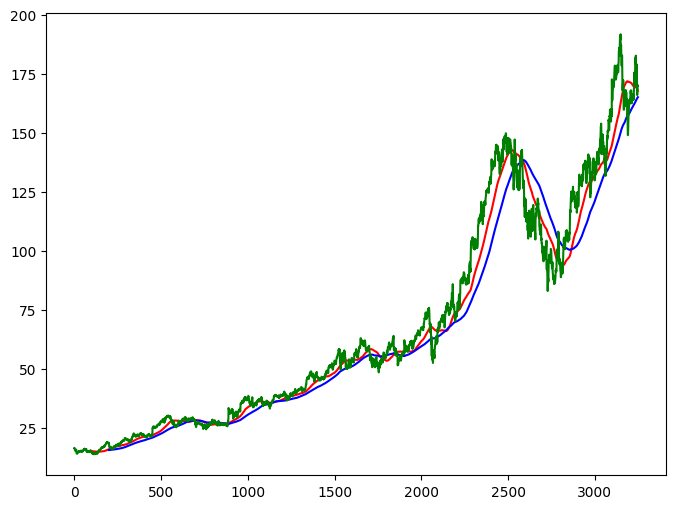

In [4]:
moving_arround_100_days = data.Close.rolling(100).mean()
moving_arround_200_days = data.Close.rolling(200).mean()
mlt.figure(figsize=(8,6))
mlt.plot(moving_arround_100_days,'r')
mlt.plot(moving_arround_200_days, 'b')
mlt.plot(data.Close,'g')
mlt.show()

In [5]:
data.dropna(inplace=True)

In [6]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [7]:
data_train.shape[0]

2599

In [8]:
data_test.shape[0]

650

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaler = scaler.fit_transform(data_train)

In [10]:
x=[]
y=[]
for i in range(100, data_train_scaler.shape[0]):
    x.append(data_train_scaler[i-100:i])
    y.append(data_train_scaler[i,0])

In [11]:
x,y = np.array(x),np.array(y)

In [12]:
from keras.layers import Dropout, LSTM, Dense
from keras.models import Sequential

2025-08-25 22:40:24.015282: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-25 22:40:24.025918: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 22:40:24.486059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-25 22:40:27.060189: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [13]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences=True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

2025-08-25 22:40:27.546867: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/hell/Project/predict-stock-price/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 0.0213
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0049
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0053
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0047
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0036
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0038
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0033
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0034
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0029
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0045
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0031
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0029
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 0.0026
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0025
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [17]:
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days,data_test],ignore_index=True)

In [20]:
data_test_scaler = scaler.fit_transform(data_test)

In [21]:
x=[]
y=[]
for i in range(100, data_test_scaler.shape[0]):
    x.append(data_test_scaler[i-100:i])
    y.append(data_test_scaler[i,0])

x,y = np.array(x), np.array(y)

In [25]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [28]:
scale = 1/scaler.scale_

y_predict = y_predict * scale
y = y * scale

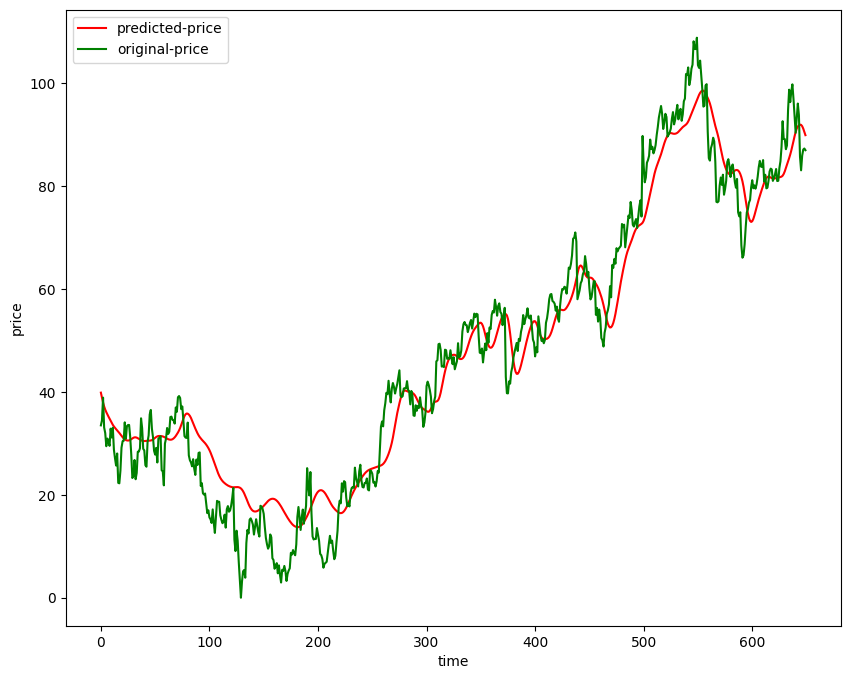

In [31]:
mlt.figure(figsize=(10,8))
mlt.plot(y_predict, 'r', label = 'predicted-price')
mlt.plot(y,'g', label = 'original-price')
mlt.xlabel('time')
mlt.ylabel('price')
mlt.legend()
mlt.show()


In [32]:
model.save('stock-prediction-model.keras')